In [ ]:
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dfVIB = pd.read_csv('/content/drive/MyDrive/Final project PTTK/VIB Historical Data.csv')
dfSNV = pd.read_csv('/content/drive/MyDrive/Final project PTTK/SVN Historical Data.csv')
dfVNM = pd.read_csv('/content/drive/MyDrive/Final project PTTK/VNM ETF Stock Price History.csv')

dfSNV = dfSNV[::-1]
dfVNM = dfVNM[::-1]

dfVIB['Date'] = pd.to_datetime(dfVIB['Date'])
train_dates = pd.to_datetime(dfVIB['Date'])

dfSNV['Date'] = pd.to_datetime(dfSNV['Date'])
dfVNM['Date'] = pd.to_datetime(dfVNM['Date'])

dfVIB = dfVIB.dropna()
dfSNV = dfSNV.dropna()
dfVNM = dfVNM.dropna()

dfVIB[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change']] = dfVIB[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change']].astype(float)

dfVIB['Date'] = pd.to_datetime(dfVIB['Date'])
dfVIB.set_index('Date', inplace=True)

dfSNV['Date'] = pd.to_datetime(dfSNV['Date'])
dfSNV.set_index('Date', inplace=True)

dfVNM['Date'] = pd.to_datetime(dfVNM['Date'])
dfVNM.set_index('Date', inplace=True)



In [ ]:
dfVIB.head()

,Price,Open,High,Low,Vol.,Change
Date,,,,,,
2017-01-10,8419.0,8599.0,8599.0,8329.0,484450.0,0.0108
2017-01-11,8329.0,8419.0,8419.0,8239.0,357630.0,-0.0107
2017-01-12,7564.0,8104.0,8104.0,7564.0,107940.0,-0.0918
2017-01-13,6843.0,7339.0,7339.0,6798.0,145860.0,-0.0953
2017-01-16,6888.0,6933.0,6933.0,6708.0,277200.0,0.0066


### VIB

In [ ]:
train_size = int(len(dfVIB) * 0.8)
train, test = dfVIB[0:train_size], dfVIB[train_size:]

trainX = train.drop(['Price'], axis = 1)
trainY = train['Price']


testX = test.drop(['Price'], axis = 1)
testY = test['Price']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 'scale', 'auto'],
              'epsilon': [0.1, 0.2, 0.5, 1]}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
grid_search.fit(trainX, trainY)

best_svr = grid_search.best_estimator_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
grid_search.fit(trainX, trainY)

best_svr = grid_search.best_estimator_


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(trainX, trainY)
y_pred_rf = rf_model.predict(testX)

In [ ]:
predict_period_dates = pd.date_range(list(train_dates)[-1], periods=30).tolist()
print(predict_period_dates)

#Make prediction
prediction1 = rf_model.predict(testX[-30:])

[Timestamp('2022-12-30 00:00:00', freq='D'), Timestamp('2022-12-31 00:00:00', freq='D'), Timestamp('2023-01-01 00:00:00', freq='D'), Timestamp('2023-01-02 00:00:00', freq='D'), Timestamp('2023-01-03 00:00:00', freq='D'), Timestamp('2023-01-04 00:00:00', freq='D'), Timestamp('2023-01-05 00:00:00', freq='D'), Timestamp('2023-01-06 00:00:00', freq='D'), Timestamp('2023-01-07 00:00:00', freq='D'), Timestamp('2023-01-08 00:00:00', freq='D'), Timestamp('2023-01-09 00:00:00', freq='D'), Timestamp('2023-01-10 00:00:00', freq='D'), Timestamp('2023-01-11 00:00:00', freq='D'), Timestamp('2023-01-12 00:00:00', freq='D'), Timestamp('2023-01-13 00:00:00', freq='D'), Timestamp('2023-01-14 00:00:00', freq='D'), Timestamp('2023-01-15 00:00:00', freq='D'), Timestamp('2023-01-16 00:00:00', freq='D'), Timestamp('2023-01-17 00:00:00', freq='D'), Timestamp('2023-01-18 00:00:00', freq='D'), Timestamp('2023-01-19 00:00:00', freq='D'), Timestamp('2023-01-20 00:00:00', freq='D'), Timestamp('2023-01-21 00:00:00'

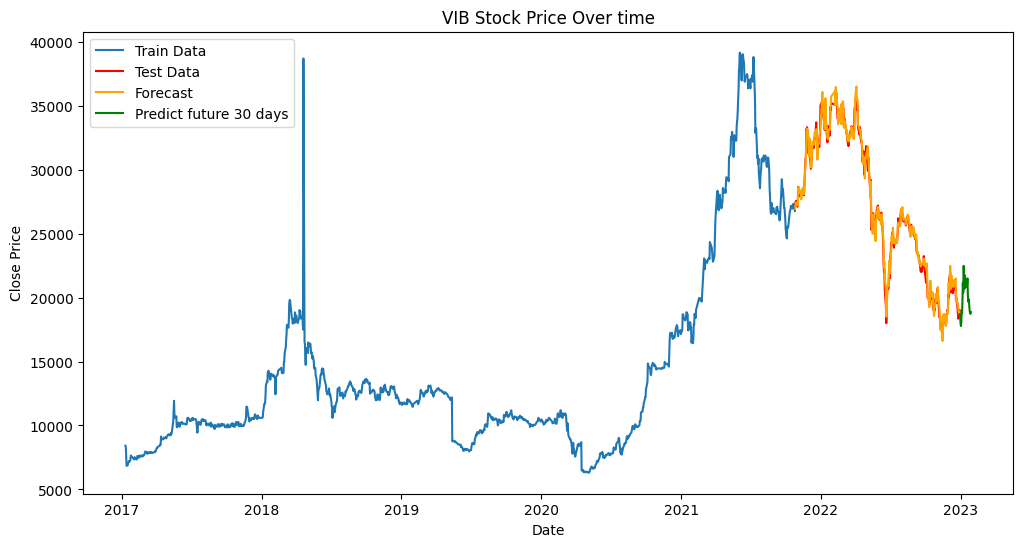

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Price'], label='Train Data')
plt.plot(test.index, test['Price'], label='Test Data', color = 'red')
plt.plot(test.index, y_pred_rf, color='orange', label='Forecast')
plt.plot(predict_period_dates, prediction1, color = 'green', label = "Predict future 30 days")
plt.title('VIB Stock Price Over time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming testY and y_pred_rf are already defined
# Calculate R-squared (R2) Score
r2 = r2_score(testY, y_pred_rf)
print(f'R-squared: {r2}')

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(testY, y_pred_rf)
print(f'Mean Absolute Percentage Error: {mape}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(testY, y_pred_rf))
print(f'Root Mean Squared Error: {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(testY, y_pred_rf)
print(f'Mean Absolute Error: {mae}')

R-squared: 0.9909478732953667
Mean Absolute Percentage Error: 1.4832248129860157
Root Mean Squared Error: 523.7869147443286
Mean Absolute Error: 384.86298657718123


### SVN

In [ ]:
train_size = int(len(dfVIB) * 0.8)
train, test = dfSNV[0:train_size], dfSNV[train_size:]

trainX = train.drop(['Price'], axis = 1)
trainY = train['Price']


testX = test.drop(['Price'], axis = 1)
testY = test['Price']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 'scale', 'auto'],
              'epsilon': [0.1, 0.2, 0.5, 1]}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
grid_search.fit(trainX, trainY)

best_svr = grid_search.best_estimator_


In [ ]:
predict_period_dates = pd.date_range(list(train_dates)[-1], periods=30).tolist()
print(predict_period_dates)

#Make prediction
prediction1 = rf_model.predict(testX[-30:])

[Timestamp('2022-12-30 00:00:00', freq='D'), Timestamp('2022-12-31 00:00:00', freq='D'), Timestamp('2023-01-01 00:00:00', freq='D'), Timestamp('2023-01-02 00:00:00', freq='D'), Timestamp('2023-01-03 00:00:00', freq='D'), Timestamp('2023-01-04 00:00:00', freq='D'), Timestamp('2023-01-05 00:00:00', freq='D'), Timestamp('2023-01-06 00:00:00', freq='D'), Timestamp('2023-01-07 00:00:00', freq='D'), Timestamp('2023-01-08 00:00:00', freq='D'), Timestamp('2023-01-09 00:00:00', freq='D'), Timestamp('2023-01-10 00:00:00', freq='D'), Timestamp('2023-01-11 00:00:00', freq='D'), Timestamp('2023-01-12 00:00:00', freq='D'), Timestamp('2023-01-13 00:00:00', freq='D'), Timestamp('2023-01-14 00:00:00', freq='D'), Timestamp('2023-01-15 00:00:00', freq='D'), Timestamp('2023-01-16 00:00:00', freq='D'), Timestamp('2023-01-17 00:00:00', freq='D'), Timestamp('2023-01-18 00:00:00', freq='D'), Timestamp('2023-01-19 00:00:00', freq='D'), Timestamp('2023-01-20 00:00:00', freq='D'), Timestamp('2023-01-21 00:00:00'

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(trainX, trainY)
y_pred_rf = rf_model.predict(testX)

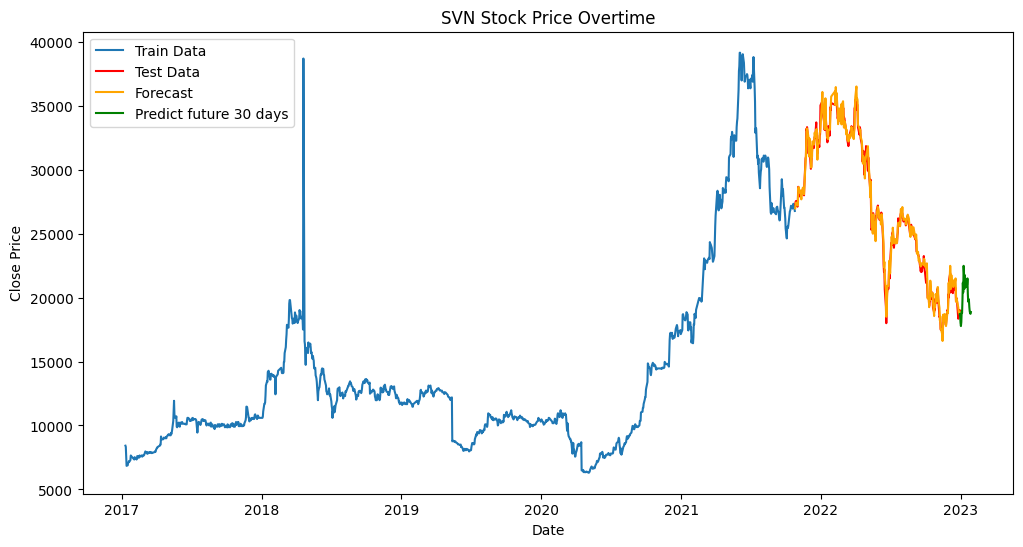

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Price'], label='Train Data')
plt.plot(test.index, test['Price'], label='Test Data', color = 'red')
plt.plot(test.index, y_pred_rf, color='orange', label='Forecast')
plt.plot(predict_period_dates, prediction1, color = 'green', label = "Predict future 30 days")
plt.title('SVN Stock Price Overtime')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming testY and y_pred_rf are already defined
# Calculate R-squared (R2) Score
r2 = r2_score(testY, y_pred_rf)
print(f'R-squared: {r2}')

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(testY, y_pred_rf)
print(f'Mean Absolute Percentage Error: {mape}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(testY, y_pred_rf))
print(f'Root Mean Squared Error: {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(testY, y_pred_rf)
print(f'Mean Absolute Error: {mae}')

R-squared: 0.9909478732953667
Mean Absolute Percentage Error: 1.4832248129860157
Root Mean Squared Error: 523.7869147443286
Mean Absolute Error: 384.86298657718123


### VNM

In [ ]:
train_size = int(len(dfVNM) * 0.8)
train, test = dfVNM[0:train_size], dfVNM[train_size:]

trainX = train.drop(['Price'], axis = 1)
trainY = train['Price']


testX = test.drop(['Price'], axis = 1)
testY = test['Price']

In [ ]:
trainX

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 'scale', 'auto'],
              'epsilon': [0.1, 0.2, 0.5, 1]}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
grid_search.fit(trainX, trainY)

best_svr = grid_search.best_estimator_


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(trainX, trainY)
y_pred_rf = rf_model.predict(testX)

In [ ]:
predict_period_dates = pd.date_range(list(train_dates)[-1], periods=30).tolist()
print(predict_period_dates)

#Make prediction
prediction1 = rf_model.predict(testX[-30:])

[Timestamp('2022-12-30 00:00:00', freq='D'), Timestamp('2022-12-31 00:00:00', freq='D'), Timestamp('2023-01-01 00:00:00', freq='D'), Timestamp('2023-01-02 00:00:00', freq='D'), Timestamp('2023-01-03 00:00:00', freq='D'), Timestamp('2023-01-04 00:00:00', freq='D'), Timestamp('2023-01-05 00:00:00', freq='D'), Timestamp('2023-01-06 00:00:00', freq='D'), Timestamp('2023-01-07 00:00:00', freq='D'), Timestamp('2023-01-08 00:00:00', freq='D'), Timestamp('2023-01-09 00:00:00', freq='D'), Timestamp('2023-01-10 00:00:00', freq='D'), Timestamp('2023-01-11 00:00:00', freq='D'), Timestamp('2023-01-12 00:00:00', freq='D'), Timestamp('2023-01-13 00:00:00', freq='D'), Timestamp('2023-01-14 00:00:00', freq='D'), Timestamp('2023-01-15 00:00:00', freq='D'), Timestamp('2023-01-16 00:00:00', freq='D'), Timestamp('2023-01-17 00:00:00', freq='D'), Timestamp('2023-01-18 00:00:00', freq='D'), Timestamp('2023-01-19 00:00:00', freq='D'), Timestamp('2023-01-20 00:00:00', freq='D'), Timestamp('2023-01-21 00:00:00'

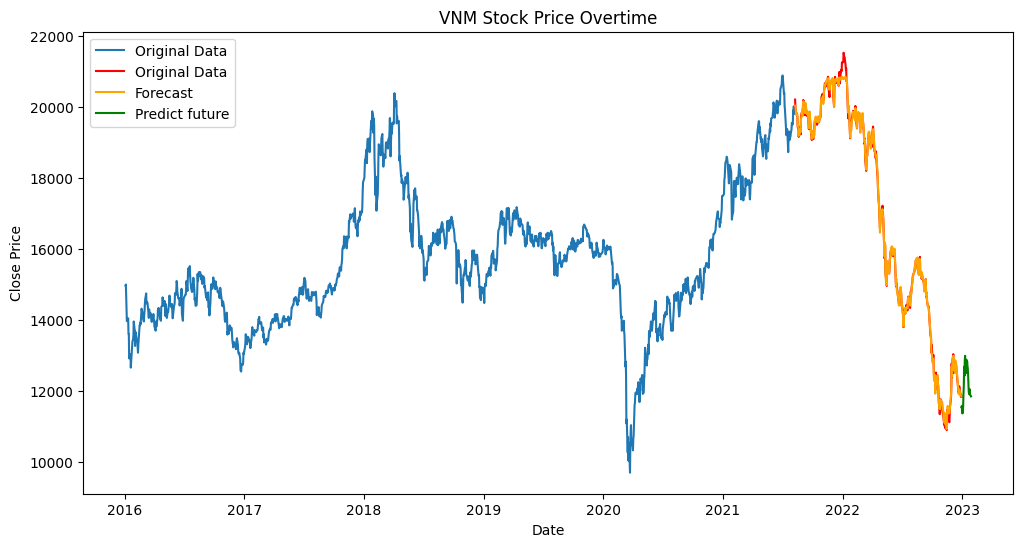

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Price'], label='Original Data')
plt.plot(test.index, test['Price'], label='Original Data', color = 'red')
plt.plot(test.index, y_pred_rf, color='orange', label='Forecast')
plt.plot(predict_period_dates, prediction1, color = 'green', label = "Predict future")
plt.title('VNM Stock Price Overtime')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming testY and y_pred_rf are already defined
# Calculate R-squared (R2) Score
r2 = r2_score(testY, y_pred_rf)
print(f'R-squared: {r2}')

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(testY, y_pred_rf)
print(f'Mean Absolute Percentage Error: {mape}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(testY, y_pred_rf))
print(f'Root Mean Squared Error: {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(testY, y_pred_rf)
print(f'Mean Absolute Error: {mae}')

R-squared: 0.9987266726869382
Mean Absolute Percentage Error: 0.4137563220275836
Root Mean Squared Error: 113.83073264303879
Mean Absolute Error: 68.74674220963162
